## Linear Regression 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url, sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Analysis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

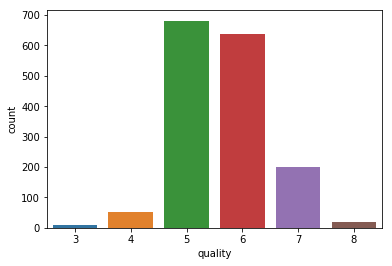

In [4]:
sns.countplot(x='quality', data=wine)

C:\Users\Computer World\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Computer World\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Computer World\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Computer World\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

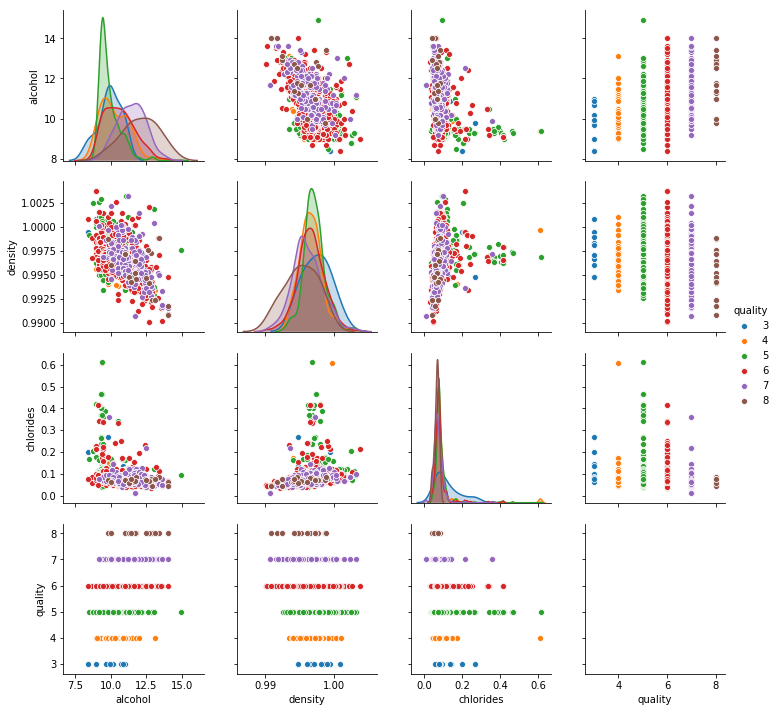

In [5]:
sns.pairplot(wine[['alcohol','density','chlorides','quality']], hue='quality')

## Train, test set split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = wine.drop(['quality'],axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Loading the model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_pred = lr.predict(X_test)

In [12]:
np.around(y_pred[:10])

array([6., 5., 6., 5., 6., 6., 5., 5., 5., 6.])

In [13]:
lr.score(X_test, y_test)

0.35693079437315134

In [14]:
lr.score??

## Evaluating the model

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test, y_pred))

0.3479137119587643


## Coefficient Interpretation

In [125]:
lr.coef_

array([  3.16575509e-02,  -9.65256158e-01,  -2.11867158e-01,
         4.97001468e-02,  -2.29964369e+00,   2.62300554e-03,
        -2.99335914e-03,  -3.78661526e+01,  -4.57376944e-01,
         1.14739673e+00,   2.41898532e-01])

In [128]:
df_coff = pd.DataFrame(lr.coef_, index=wine.drop(['quality'],axis=1).columns, columns=['coefficients'])
df_coff

,coefficients
fixed acidity,0.031658
volatile acidity,-0.965256
citric acid,-0.211867
residual sugar,0.049700
chlorides,-2.299644
free sulfur dioxide,0.002623
total sulfur dioxide,-0.002993
density,-37.866153
pH,-0.457377
sulphates,1.147397


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **chlorides** is associated with an **decrease of 2.299644 ** in wine quality.
- Holding all other features fixed, a 1 unit increase in **density** is associated with an **decrease of 37.866153 ** in wine quality.
- Holding all other features fixed, a 1 unit increase in **sulphates** is associated with an **increase of 1.147397 ** in wine quality.


Does this make sense? If you want, you can repeat this sort of analysis, check out the boston dataset(housing price), Advertizements, etc

## Intercept for the linear Regression line 
The constant term of the linear regression model can be accessed through the attribute **intercept_**

In [129]:
lr.intercept_

42.095929170994211

In [24]:
from sklearn.datasets import load_boston, load_diabetes

In [25]:
boston, diabetes = load_boston(), load_diabetes()

In [27]:
x =boston.data
y = boston.target

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression, logistic, Ridge, Lasso

In [55]:
l = Ridge(0.1)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
l.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
lr.score(X_train, y_train), l.score(X_train, y_train)

(0.741134867659564, 0.7410781947684885)

In [58]:
lr.score(X_test, y_test), l.score(X_test, y_test)

(0.7267803585082466, 0.725898178009579)

In [15]:
lr.score??

In [34]:
lr.coef_

array([-9.92164603e-02,  4.09692960e-02,  3.50489261e-02,  2.08224447e+00,
       -1.56802013e+01,  4.41211230e+00, -1.04338329e-02, -1.34406011e+00,
        2.56222770e-01, -1.15947666e-02, -9.41336034e-01,  9.97456042e-03,
       -4.48274082e-01])

In [59]:
l.coef_

array([-9.78499866e-02,  4.11323262e-02,  2.99334417e-02,  2.06117749e+00,
       -1.43989186e+01,  4.42070272e+00, -1.15478243e-02, -1.32602179e+00,
        2.52491949e-01, -1.16904367e-02, -9.28233675e-01,  1.00533847e-02,
       -4.50403884e-01])

In [35]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [36]:
pd.DataFrame({'features': boston.feature_names, 'coeff': lr.coef_})

,features,coeff
0,CRIM,-0.099216
1,ZN,0.040969
2,INDUS,0.035049
3,CHAS,2.082244
4,NOX,-15.680201
5,RM,4.412112
6,AGE,-0.010434
7,DIS,-1.344060
8,RAD,0.256223
9,TAX,-0.011595


In [37]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [39]:
lr.predict(X_test)[:10]

array([28.88239728, 33.21271616, 26.6920764 , 16.31744352, 21.23438722,
       15.71268745, 14.26757064, 21.36264924, 17.70270038, 20.73781937])

In [40]:
y_test[:10]

array([25. , 36.1, 23.9, 20.1, 21.5, 10.2, 13.3, 19.3, 14.5, 20. ])